# BerkeleyGW 试用实验报告

## 一、实验目的
本实验旨在利用 BerkeleyGW 软件对硅材料的激子特性进行模拟计算，并通过对计算结果的分析绘制相关图表，深入理解硅材料的光学性质和激子行为。

## 二、实验环境与工具

### （一）软件
- BerkeleyGW 软件：用于进行多体微扰理论计算，以研究材料的特性。
- Docker：用于构建和管理 BerkeleyGW 的运行环境，确保计算环境的一致性和可重复性。
- Python 及相关库（如 NumPy、Matplotlib）：用于数据处理和绘图。
### （二）系统
- Windows11:底层操作系统，为Docker-desktop提供运行基础
- WSL2:基于虚拟化技术的 Linux 系统层，为发行版Ubuntu提供运行环境
- Ubuntu24.04：具体部署的 Linux 发行版，承载计算任务的核心操作环境
### （三）硬件
- CPU:Intel 12490kf
- GPU:RTX4060
- RAM:2*32G DDR4 3600Mhz

## 三、实验步骤及说明

### （一）创建工作目录并准备示例文件
1. **mkdir /tmp/bgw**
    - **作用**：在系统的临时目录 `/tmp` 下创建一个名为 `bgw` 的新目录，作为本次实验的工作目录，用于存放后续的计算文件和结果。
    - **意义**：为实验提供一个独立、整洁的文件管理空间，便于组织和管理实验相关的所有文件，避免与系统其他文件产生混淆。
2. **cd /tmp/bgw**
    - **作用**：将当前工作目录切换到刚刚创建的 `/tmp/bgw` 目录下，后续的操作都将在此目录内进行。
    - **意义**：确保后续的文件操作（如复制文件、执行脚本等）都在正确的工作目录中，符合实验的文件管理逻辑。
3. **bgw - docker cp - R /opt/BerkeleyGW - 1.2.0/examples/EPM/silicon.**
    - **作用**：使用 Docker 命令将 BerkeleyGW 安装目录下的硅材料文件（位于 `/opt/BerkeleyGW - 1.2.0/examples/EPM/silicon` ）复制到当前工作目录（`/tmp/bgw` ）下。`-R` 选项表示递归复制，即复制整个目录及其子目录和文件。
    - **意义**：获取参考文件，为实验提供了初始的计算框架和参数设置参考，基于此可以快速开展对硅材料激子特性的模拟计算。
4. **cd silicon**
    - **作用**：将当前工作目录切换到刚刚复制过来的 `silicon` 目录下，该目录包含了硅材料计算的具体文件和脚本。
    - **意义**：使后续执行的脚本和操作都在硅材料计算的相关文件环境中进行，确保脚本能够正确读取和处理相应的输入文件。

### （二）执行计算脚本
1. **bgw - docker./script_0.sh**
    - **作用**：在 Docker 环境中执行 `script_0.sh` 脚本。该脚本用于设置一些初始的计算参数、准备输入文件等前期工作，包括对硅材料晶体结构的定义、基组的选择等操作。
    - **意义**：为后续的计算奠定基础，通过设置合理的初始参数，确保计算能够准确地反映硅材料的物理性质。
2. **bgw - docker./script_1.sh**
    - **作用**：执行 `script_1.sh` 脚本，该脚本会调用 BerkeleyGW 软件进行电子结构计算，例如基于密度泛函理论（DFT）计算硅材料的能带结构、电子态密度等基本电子结构信息。
    - **意义**：电子结构是研究激子特性的基础，通过计算得到的能带结构可以确定硅材料的带隙等关键参数，而电子态密度则有助于理解电子在不同能量状态下的分布情况，这些信息对于后续准确计算激子的产生、跃迁等过程至关重要。
3. **bgw - docker./script_2.sh**
    - **作用**：运行 `script_2.sh` 脚本，此脚本可能会基于前一步得到的电子结构结果，进一步计算电子 - 空穴相互作用，构建 Bethe - Salpeter 方程（BSE）的核函数等，为求解激子问题做准备。
    - **意义**：激子是由电子 - 空穴对通过库仑相互作用形成的准粒子，计算电子 - 空穴相互作用是准确描述激子特性的关键步骤。构建 BSE 核函数是为了后续能够通过求解 BSE 方程得到激子的能量、波函数等信息。
4. **bgw - docker./script_3.sh**
    - **作用**：执行 `script_3.sh` 脚本，主要任务是求解 Bethe - Salpeter 方程，得到硅材料中激子的具体性质，如激子能量、跃迁矩阵元等，并生成相应的输出文件，这些输出文件将作为后续绘图和分析的基础。
    - **意义**：通过求解 BSE 方程，我们能够获得硅材料中激子的本征能量和波函数，这些信息直接反映了激子在硅材料中的行为。激子能量决定了材料吸收光子的能量阈值，跃迁矩阵元则与光吸收强度等光学性质密切相关。

### （三）absorption部分的输出文件（只做了这部分）
#### **1. `absorption_eh.dat`（含激子效应）**
- **数据列**：  
  - **第 1 列**：能量（Energy, eV）  
  - **第 2 列**：虚部介电函数（ε₂）  
  - **第 3 列**：实部介电函数（ε₁）  
  - **第 4 列**：激子态密度（DOS，归一化后 ∫DOS dω = 1） 

#### **2. `absorption_noeh.dat`（无激子效应，RPA 近似）**
- **数据列**：  
  - **第 1 列**：能量（Energy, eV）  
  - **第 2 列**：虚部介电函数（ε₂，RPA）  
  - **第 3 列**：实部介电函数（ε₁，RPA）  
  - **第 4 列**：联合态密度（JDOS，归一化后 ∫JDOS dω = 1）  

#### **3. `eigenvalues.dat`**  
- **数据内容**：电子-空穴对本征值（激子能量）和跃迁矩阵元，用于分析离散激子峰。

### （四）图表绘制

#### 1.介电函数与态密度函数图
根据 'absorption_eh.dat' 与 'absorption_noeh.dat' 可以绘制下图


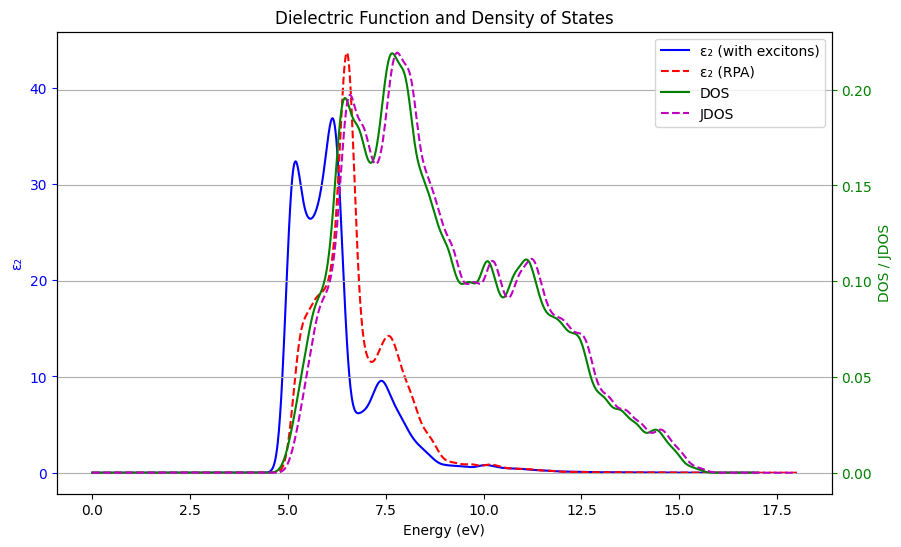

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 读取含激子效应的数据
eh_data = np.loadtxt('absorption_eh.dat')
energy_eh = eh_data[:, 0]
eps2_eh = eh_data[:, 1]
dos_eh = eh_data[:, 3]

# 读取无激子效应的数据
noeh_data = np.loadtxt('absorption_noeh.dat')
energy_noeh = noeh_data[:, 0]
eps2_noeh = noeh_data[:, 1]
jdos_noeh = noeh_data[:, 3]

# 创建双轴图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 左轴：介电函数虚部
ax1.plot(energy_eh, eps2_eh, 'b-', label='ε₂ (with excitons)')
ax1.plot(energy_noeh, eps2_noeh, 'r--', label='ε₂ (RPA)')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('ε₂', color='b')
ax1.tick_params('y', colors='b')

# 右轴：态密度
ax2 = ax1.twinx()
ax2.plot(energy_eh, dos_eh, 'g-', label='DOS')
ax2.plot(energy_noeh, jdos_noeh, 'm--', label='JDOS')
ax2.set_ylabel('DOS / JDOS', color='g')
ax2.tick_params('y', colors='g')

# 图例与标题
plt.title('Dielectric Function and Density of States')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper right')
plt.grid(True)
plt.savefig('absorption_comparison.png', dpi=300)
plt.show()

##### 坐标轴
- **横轴（x轴）**：表示能量（Energy），单位是电子伏特（eV） 。它代表了光子的能量或者电子跃迁涉及的能量范围，是理解材料光学响应的关键参数轴。
- **左侧纵轴（y轴）**：标记为 $(\varepsilon_{2})$ ，用于衡量介电函数的虚部。介电函数的虚部与材料的光吸收密切相关，它描述了材料在不同能量下吸收光子的能力。 
- **右侧纵轴**：标记为 “DOS / JDOS” ，用于展示态密度（DOS，Density of States ）和联合态密度（JDOS，Joint Density of States ） 。态密度表示在给定能量范围内电子态的数量，联合态密度则常用于描述涉及电子 - 空穴对跃迁的态密度情况。

##### 图例及对应曲线
- **$(\varepsilon_{2})$ (with excitons) - 蓝色实线**：表示考虑激子效应时介电函数的虚部 。激子是电子 - 空穴对通过库仑相互作用形成的准粒子。考虑激子效应时，材料的光吸收特性会发生变化，通常会使吸收峰更尖锐且位置向低能端移动，这是因为激子的束缚能降低了电子 - 空穴对跃迁所需的能量。 
- **$(\varepsilon_{2})$ (RPA) - 红色虚线**：代表在随机相位近似（Random Phase Approximation, RPA ）下介电函数的虚部 。RPA 是一种不考虑电子 - 空穴相互作用的近似方法，在这种近似下，材料的光吸收峰通常较宽且位置相对偏高能端。对比蓝色实线和红色虚线，可以直观地看到激子效应对材料光吸收特性的显著影响。 
- **DOS - 绿色实线**：态密度曲线 ，反映了材料中激子态在不同能量下的分布情况。DOS 的峰值表示在相应能量处激子态的数量较多，这些能量位置往往对应着材料中激子容易形成或存在的能量状态。 
- **JDOS - 紫色虚线**：联合态密度曲线 ，它描述了在考虑电子 - 空穴对跃迁时，不同能量下可参与跃迁的态的密度情况。与 DOS 相比，JDOS 更侧重于描述电子 - 空穴对跃迁相关的态的分布，常用于分析材料的光吸收和发光过程中涉及的跃迁过程。

##### 整体物理意义
这张图综合展示了材料在考虑和不考虑激子效应时的光吸收特性（通过介电函数虚部体现 ），以及与电子 - 空穴对相关的态密度分布（DOS 和 JDOS ） 。通过分析这些曲线，可以深入理解材料的光学性质，例如：
- 光吸收特性：对比蓝色和红色曲线，考虑激子效应时，硅材料光吸收峰更尖锐且位置向低能端移动，表明激子效应显著影响硅的光吸收特性。硅在特定能量下对光子吸收能力改变，这对硅基光电器件（如硅太阳能电池）吸收光谱有重要影响，可据此优化器件对光的吸收效率 。
- 激子相关性质：绿色的 DOS 曲线峰值位置，反映硅中激子较稳定存在的能量状态，可用于分析激子束缚能等性质。不同能量下激子态分布情况，有助于理解激子在硅材料中的形成与复合机制 。
- 电子 - 空穴跃迁：紫色 JDOS 曲线展示电子 - 空穴对跃迁相关态密度，结合其他曲线可分析硅中电子 - 空穴跃迁过程，了解光激发下电子从价带跃迁到导带的情况，这对研究硅的光电转换过程至关重要 。
- 材料能带结构验证：这些曲线特征与硅的能带结构相互印证，可用于验证基于理论计算（如多体微扰理论）得到的硅材料能带结构准确性，进一步理解硅的电子结构与光学性质之间的关联 。

#### 2.激子能量分布图

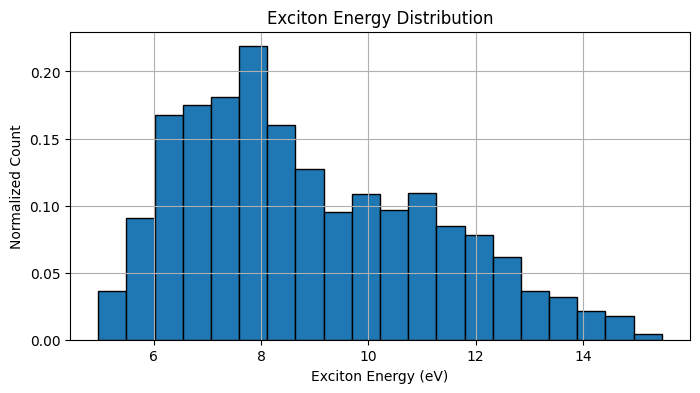

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 读取本征值数据（假设第 1 列为能量，单位 eV）
eigenvalues = np.loadtxt('eigenvalues.dat')[:, 0]

# 绘制直方图
plt.figure(figsize=(8, 4))
plt.hist(eigenvalues, bins=20, edgecolor='black', density=True)
plt.xlabel('Exciton Energy (eV)')
plt.ylabel('Normalized Count')
plt.title('Exciton Energy Distribution')
plt.grid(True)
plt.savefig('exciton_energies.png', dpi=300)
plt.show()


##### 图表基本信息
- **标题**：明确指出图表展示的是激子能量分布情况。
- **横轴（x轴）**：表示激子能量（Exciton Energy），单位为电子伏特（eV） ，范围从大约 5 eV 到 15 eV 左右，体现了所研究的激子能量区间。
- **纵轴（y轴）**：为归一化计数（Normalized Count） ，反映了在各个能量区间内激子出现的数量经过归一化处理后的数值。归一化处理使得不同区间的计数可以在同一尺度下比较，其总和通常为 1 ，便于分析不同能量区间激子数量的相对占比。

##### 数据分布特征
- **峰值位置**：图表中在能量约为 8 eV 处出现了明显的峰值，这表明在该能量附近激子出现的数量相对最多 。说明在研究体系中，激子更倾向于具有约 8 eV 的能量状态，可能对应着材料中某种特定的电子 - 空穴相互作用模式或能级结构，使得此能量下激子的形成或存在更为稳定。 
- **整体趋势**：从左到右观察，激子数量在能量较低（接近 5 eV ）时较少，随着能量增加逐渐增多，在 8 eV 左右达到最大值后，又随着能量进一步升高而逐渐减少 。这种分布趋势暗示了材料中激子能量存在一个相对集中的范围，且偏离这个范围后激子数量会显著降低。 
- **多峰结构**：除了 8 eV 附近的主峰外，在其他能量位置（如 10 - 12 eV 区间 ）也存在一些相对较小的峰。这些次峰可能代表着不同的激子束缚态 ，例如对应着不同量子态（如 1s、2s 等 ）的激子，或者是由于材料中的杂质、缺陷等因素导致的激子能量的微小变化和额外分布。

##### 物理意义分析
- **激子稳定性**：峰值位置对应的能量反映了激子相对稳定的能量状态 。在 8 eV 处激子数量最多，说明在此能量下激子的结合能使得它们能够更稳定地存在 。结合能与电子 - 空穴之间的库仑相互作用以及材料的能带结构等因素相关，通过分析这个能量值，可以进一步研究材料中激子的形成机制和稳定性条件。 
- **材料光学性质**：激子能量分布与材料的光学性质密切相关 。材料吸收光子产生激子，激子的能量分布决定了材料能够吸收哪些能量的光子 。此图中激子主要集中在 8 eV 附近，意味着材料对能量接近 8 eV 的光子吸收概率相对较大，这对于理解材料的光吸收谱以及设计基于该材料的光电器件（如太阳能电池、发光二极管等 ）具有重要指导意义。 
- **与理论模型对比**：将该图中的激子能量分布与理论模型（如基于半导体能带理论的激子模型 ）进行对比，可以验证理论模型的准确性和适用性 。如果存在差异，可能需要进一步考虑材料中未被理论模型完全涵盖的因素，如电子 - 声子相互作用、杂质散射等对激子能量分布的影响，从而进一步完善对材料微观物理机制的理解。

### 激子跃迁强度与能量关系的散点图

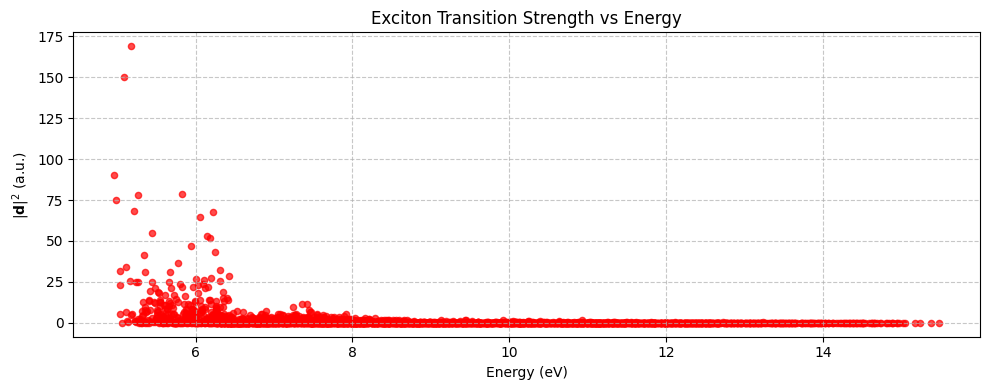

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 读取数据（跳过以 '#' 开头的注释行，读取前3列）
data = np.loadtxt('eigenvalues.dat', comments='#', usecols=(0, 1))

# 提取能量和跃迁矩阵元平方数
energy = data[:, 0]       # 第1列：能量（eV）
dipole_sq = data[:, 1]    # 第2列：跃迁矩阵元平方

# 绘制散点图
plt.figure(figsize=(10, 4))
plt.scatter(energy, dipole_sq, s=20, alpha=0.7, color='red')
plt.xlabel('Energy (eV)')
plt.ylabel(r'$|\mathbf{d}|^2$ (a.u.)')
plt.title('Exciton Transition Strength vs Energy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('transition_strength.png', dpi=300)
plt.show()

### 图表基本信息
- **标题**：清晰表明图表展示的是激子跃迁强度随能量的变化关系。
- **横轴（x轴）**：代表能量（Energy），单位是电子伏特（eV） ，能量范围从大约 5 eV 延伸至 15 eV 左右，界定了研究激子跃迁所涉及的能量区间。
- **纵轴（y轴）**：表示 $(|\mathbf{d}|^2)$ ，单位为原子单位（a.u.） ，这里 $(|\mathbf{d}|^2)$ 代表跃迁矩阵元的平方，用于衡量激子跃迁强度。跃迁矩阵元描述了激子在不同能量状态之间跃迁的概率幅度，其平方值越大，表明跃迁概率越高，对应的光吸收或发射过程就越强。

### 数据分布特征
- **能量低区间的集中分布**：在能量较低的区域（大约 5 - 7 eV ） ，散点分布较为密集，且存在一些跃迁强度相对较高的点。例如，在 5 - 6 eV 之间有几个点的跃迁强度 $(|\mathbf{d}|^2)$ 达到了 150 a.u. 左右甚至更高，这说明在该能量范围内存在较多且较强的激子跃迁过程。这些较强的跃迁可能对应着材料中一些主要的光学吸收通道，与材料的带隙结构以及电子 - 空穴相互作用密切相关。 
- **随能量升高的变化趋势**：随着能量升高，散点逐渐变得稀疏，跃迁强度整体呈下降趋势。在能量超过 8 eV 后，跃迁强度显著降低，大部分散点的 $(|\mathbf{d}|^2)$ 值都处于较低水平（接近 0 ） 。这表明在较高能量区域，激子发生跃迁的概率相对较低，材料对这些能量的光子吸收较弱。 
- **离散性**：散点呈现出明显的离散特征，说明激子跃迁并非在所有能量点上均匀发生，而是集中在某些特定的能量位置，体现了激子跃迁的量子化特性。这些特定能量位置对应着材料中允许的电子 - 空穴对跃迁的能级，与材料的能带结构和激子的量子态相关。

### 物理意义分析
- **光吸收特性**：该图直接反映了材料的光吸收特性 。跃迁强度大的能量区域对应着材料能够强烈吸收光子的能量范围，因为跃迁过程伴随着光子的吸收或发射。通过分析图中高跃迁强度的能量点，可以确定材料的主要光吸收峰位置，这对于设计基于该材料的光电器件（如太阳能电池、光电探测器等 ）至关重要，能够帮助优化器件对特定波长光的吸收效率。 
- **激子态的性质**：离散的散点分布以及不同能量下跃迁强度的变化，揭示了激子态的量子化本质和能级结构 。特定能量位置的高跃迁强度点暗示了存在一些较为稳定的激子束缚态，这些态之间的跃迁具有较高的概率。结合材料的能带结构理论，可以进一步理解激子在材料中的行为，如激子的形成、复合过程以及与电子 - 空穴对的相互作用机制。 
## 四、总结
1. 本实验采用了BerkeleyGW进行计算，熟悉了BerkeleyGW的计算流程，为以后深入研究打下基础。

2. 计算了硅材料的激子特性，并分析了其表层的物理意义，关于其背后的原理有待进一步学习理解。